In [1]:
import sympy
from sympy import *
import numpy as np
init_printing(use_unicode=True)
from matplotlib import rc
import mpmath
import pandas as pd
import matplotlib.pylab as plt

d, cx, varx, rot_x = symbols('d alpha_x  delta_theta_x theta')
cy, vary = symbols("alpha_y delta_theta_y")

d1, d2, d0 = symbols("d_1 d_2, d_0")

f1, f2 = symbols('f_1 f_2')
dx, dy, dtheta = symbols('dx, dy , delta_theta')

xi, yi, thxi, thyi = symbols('x_i y theta_i theta_y')

drift = Matrix([ [1, 0, d, 0,0], [0,1,0,d,0], [0,0,1,0,0], [0,0,0,1,0],[0,0,0,0,1] ])

scaling = Matrix([[1,0,0,0,0], [0,1,0,0,0], [0,0,cos(cx),0,0], [0,0,0,cos(cy),0], [0,0,0,0,1]])
scaling_y = Matrix([[ cos(cy),0,0 ,0,0], [0,1,0,0,0], [0,0,1,0,0], [0,0,0,1,0], [0,0,0,0,1]])

rotx = Matrix([[cos(rot_x), -sin(rot_x),0,0,0], [sin(rot_x), cos(rot_x),0,0,0], [0,0,cos(rot_x), -sin(rot_x),0], [0,0,sin(rot_x), cos(rot_x),0] ,[0,0,0,0,1]])

t_mirror = Matrix([ [1,0,0,0,0],[0,1,0,0,0], [0,0,1,0,tan(2*varx)],[0,0,0,1,tan(2*vary)],[0,0,0,0,1] ])

vec = np.matrix([ [0],[0],[0],[0],[1] ])

z1,z2,z3 = symbols("a b c")
l_tiltx, l_tilty = symbols('delta_gamma delta_chi')
lens = Matrix([[1,0,0,0,dx ],[0,1,0,0,dy], [-1/f1, 0,1,0,l_tiltx], [0,-1/f1,0,1,l_tilty], [0,0,0,0,1]])
z1mtx = Matrix([ [1, 0, z1, 0,0], [0,1,0,z1,0], [0,0,1,0,0], [0,0,0,1,0],[0,0,0,0,1] ])
z2mtx = Matrix([ [1, 0, z2, 0,0], [0,1,0,z2,0], [0,0,1,0,0], [0,0,0,1,0],[0,0,0,0,1] ])
z3mtx = Matrix([ [1, 0, z3, 0,0], [0,1,0,z3,0], [0,0,1,0,0], [0,0,0,1,0],[0,0,0,0,1] ])

m1mtx = Matrix([ [1,0,0,0,0],[0,1,0,0,0], [0,0,1,0,tan(2*varx)],[0,0,0,1,tan(2*vary)],[0,0,0,0,1] ])

drift0 =Matrix([ [1, 0, d0, 0,0], [0,1,0,d0,0], [0,0,1,0,0], [0,0,0,1,0],[0,0,0,0,1] ])
drift1 = Matrix([ [1, 0, d1, 0,0], [0,1,0,d1,0], [0,0,1,0,0], [0,0,0,1,0],[0,0,0,0,1] ])
drift2 = Matrix([ [1, 0, d2, 0,0], [0,1,0,d2,0], [0,0,1,0,0], [0,0,0,1,0],[0,0,0,0,1] ])



mirror system:


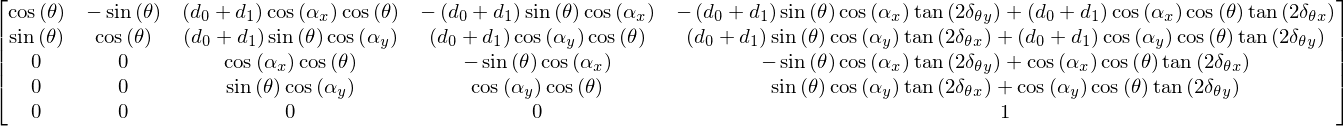

In [2]:
print("mirror system:")
m_system = drift1*drift0*scaling*rotx*t_mirror
m_system

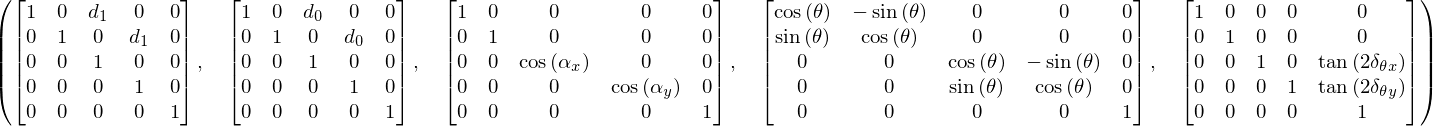

In [4]:
(drift1,drift0,scaling,rotx,t_mirror)

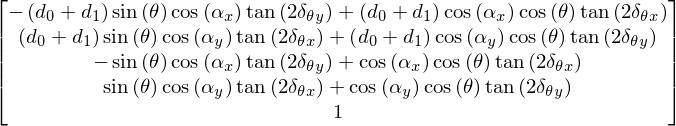

In [5]:
m1= m_system*vec

m1

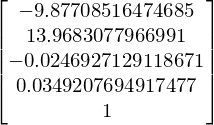

In [6]:
m1.subs([(rot_x, np.deg2rad(90)), (d0,200), (d1,200), (varx, np.deg2rad(1)),(vary, np.deg2rad(1))
                  
                 ,(cx,np.deg2rad(45)), (cy,np.deg2rad(0))   ])

In [64]:

print(np.rad2deg(-.0246), np.rad2deg(0.0349))

-1.40947617602 1.99962270501


lens system:


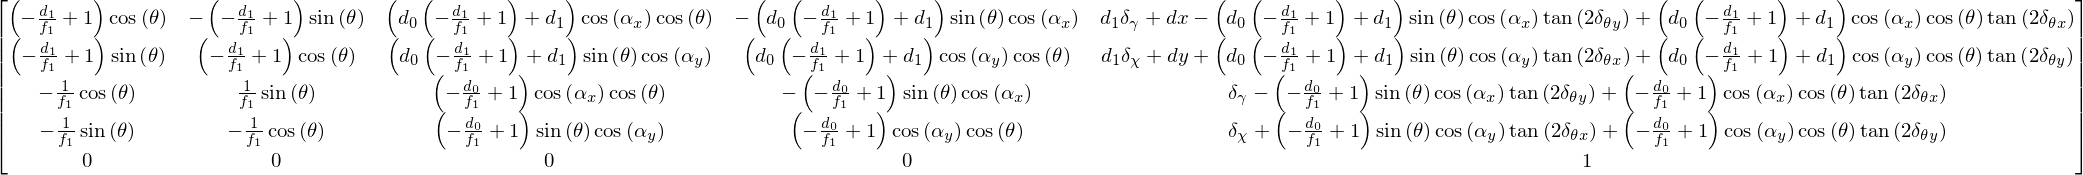

In [7]:
print("lens system:")
lens_system = drift1*lens*drift0*scaling*rotx*t_mirror

lens_system



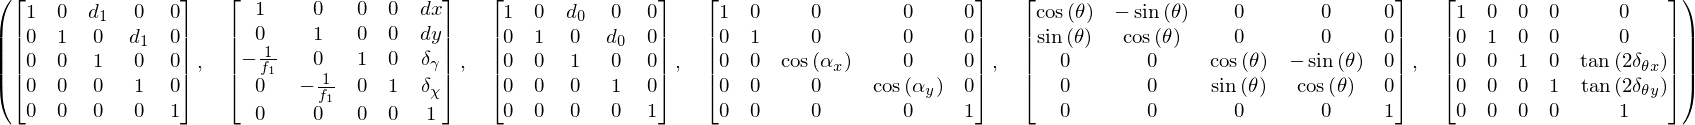

In [8]:
(drift1,lens,drift0,scaling,rotx,t_mirror)

diff (vec lens - vec mirror variation):


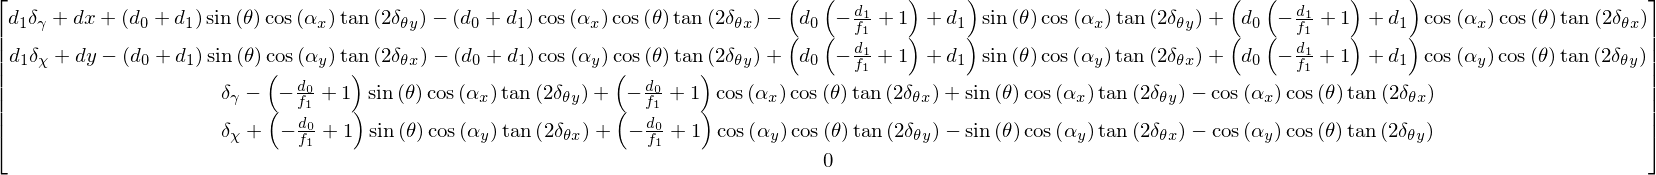

In [9]:
print("diff (vec lens - vec mirror variation):")
diff = (lens_system*vec) - (m_system*vec)
diff


+++++++
+++++++
+++++++
with tilts


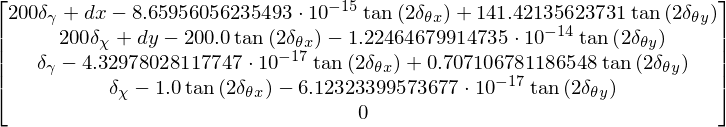

In [10]:
print("+++++++")
print("+++++++")
print("+++++++")
print("with tilts")
diff.subs([(rot_x, np.deg2rad(90)), (d0,200), (d1,200),
                 (cx,np.deg2rad(45)), (cy,np.deg2rad(0)), (f1,200)   ])

+++++++
+++++++
+++++++
with no tilts


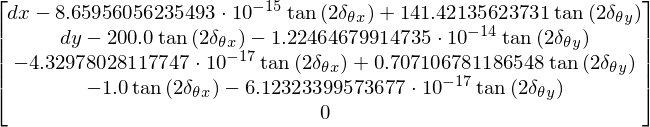

In [20]:
print("+++++++")
print("+++++++")
print("+++++++")
print("with no tilts")
diff.subs([(rot_x, np.deg2rad(90)), (d0,200), (d1,200), (l_tiltx, 0), (l_tilty,0), 
                  
                 (cx,np.deg2rad(45)), (cy,np.deg2rad(0)), (f1,200)   ])

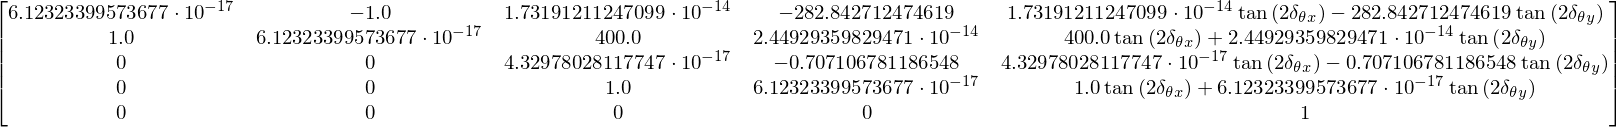

In [33]:
a = lens_system.subs([(rot_x, np.deg2rad(90)), (d0,200), (d1,200), (l_tiltx, 0), (l_tilty,0), 
                  
                 (cx,np.deg2rad(45)), (cy,np.deg2rad(0)), (f1,200)   ])

b = m_system.subs([(rot_x, np.deg2rad(90)), (d0,200), (d1,200), 
                  
                 (cx,np.deg2rad(45)), (cy,np.deg2rad(0))  ])


______
______
______
______


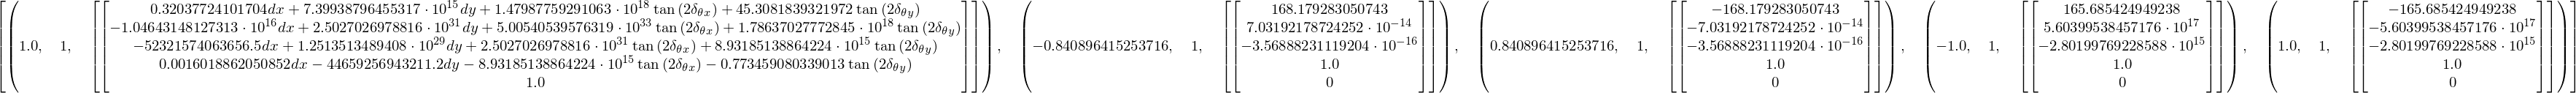

In [49]:
print("______")
print("______")
print("______")
print("______")
a.eigenvects()

In [38]:
lamda = symbols('lambda')
pl = a.charpoly(lamda)
pm = b.charpoly(lamda)

pl

In [41]:
pm

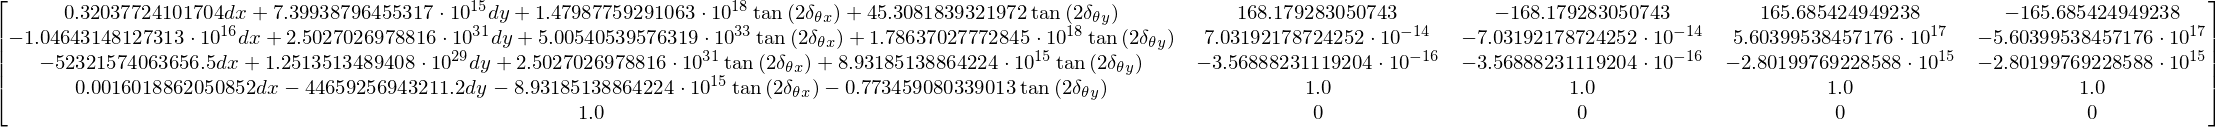

In [47]:
P, D= a.diagonalize()

P

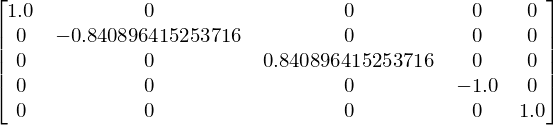

In [46]:
D